In [5]:
import pandas as pd

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingl

In [7]:
mall=  pd.read_csv(r"E:\download\Mall_Customers (1).csv")

# Explore

In [8]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# number of male and feamales customers

In [11]:
mall.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


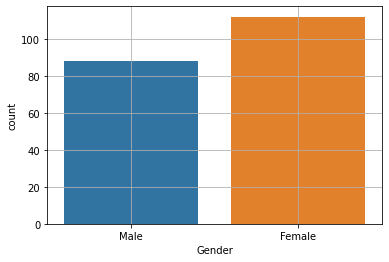

In [12]:
sns.countplot(mall["Gender"])
plt.grid()
plt.show();

# highest annual income and spending score according to gender

In [13]:
mall.sort_values(by="Spending Score (1-100)",ascending =False,inplace=True) #

In [14]:
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
11,12,Female,35,19,99
19,20,Female,35,23,98
145,146,Male,28,77,97
185,186,Male,30,99,97
127,128,Male,40,71,95
...,...,...,...,...,...
30,31,Male,60,30,4
32,33,Male,53,33,4
8,9,Male,64,19,3
158,159,Male,34,78,1


In [15]:
mall["Annual Income (k$)"].max() # Highest annual income

137

In [16]:
Gen =mall[["Annual Income (k$)","Gender"]].groupby("Gender").sum()

In [17]:
score =  mall[["Spending Score (1-100)","Gender"]].groupby("Gender").sum()

In [18]:
Gen

,Annual Income (k$)
Gender,
Female,6636
Male,5476


In [19]:
score

,Spending Score (1-100)
Gender,
Female,5771
Male,4269


# annual income of males and female

In [20]:
Gen

,Annual Income (k$)
Gender,
Female,6636
Male,5476


Text(0.5, 1.0, 'Gender vs Annual income')

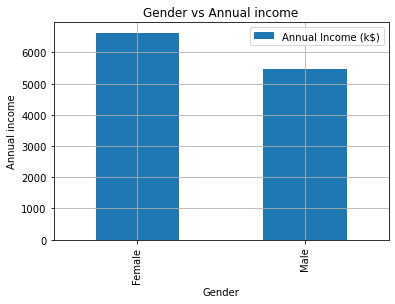

In [21]:
Gen.plot(kind="bar")
plt.grid()
plt.ylabel("Annual income")
plt.xlabel("Gender")
plt.title("Gender vs Annual income")


# females have more annual income than male

In [22]:
age =mall[["Annual Income (k$)","Age"]].groupby("Age").sum()

In [23]:
age

,Annual Income (k$)
Age,
18,205
19,456
20,208
21,194
22,94
23,249
24,157
25,173
26,116


# total annual income bases on age

In [24]:
age =age.reset_index()

In [25]:
age.sort_values(by="Annual Income (k$)",ascending=False).head()

,Age,Annual Income (k$)
14,32,959
12,30,533
18,36,486
1,19,456
20,38,447


# Age 32 have the maximum income

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


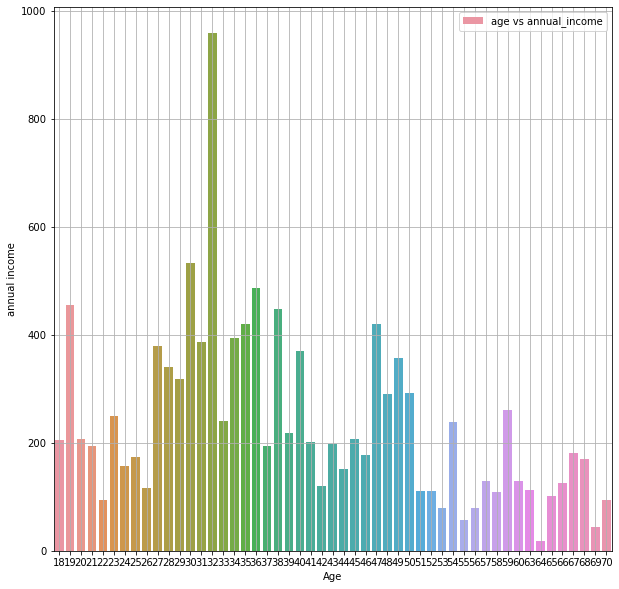

In [26]:
plt.figure(figsize=(10,10))
sns.barplot(age["Age"],age["Annual Income (k$)"],label="age vs annual_income")
plt.legend()
plt.xlabel("Age")
plt.grid()
plt.ylabel("annual income")
plt.show()

# Who have more spending score bases on gender

In [27]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
11,12,Female,35,19,99
19,20,Female,35,23,98
145,146,Male,28,77,97
185,186,Male,30,99,97
127,128,Male,40,71,95


In [28]:
spend =mall[["Spending Score (1-100)","Gender"]].sort_values(by="Spending Score (1-100)",ascending=False)

In [29]:
spend.groupby("Gender").sum()

,Spending Score (1-100)
Gender,
Female,5771
Male,4269


In [76]:
sns.boxplot(mall)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# visualize

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

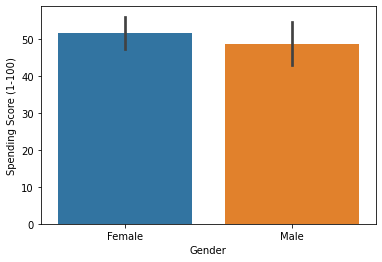

In [30]:
sns.barplot(spend["Gender"],spend["Spending Score (1-100)"])

In [31]:
score =mall[["Spending Score (1-100)","Age"]].groupby("Age").sum().reset_index()

In [32]:
score.sort_values(by="Spending Score (1-100)",ascending=False).head()

,Age,Spending Score (1-100)
14,32,726
17,35,575
12,30,562
13,31,511
11,29,383


# age 32 have the higehr spending score

# Visualize

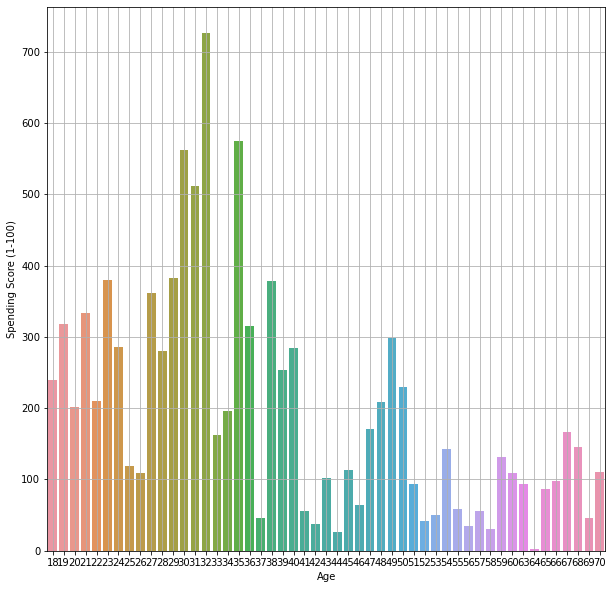

In [33]:
plt.figure(figsize=(10,10))
sns.barplot(x=score["Age"],y=score["Spending Score (1-100)"])
plt.grid()
plt.show()

# who have more purcahsing power according to age and gender

# Number of customers according to ages

In [34]:
mall["Age"].reset_index().groupby("Age").sum()

,index
Age,
18,303
19,768
20,291
21,256
22,107
23,341
24,194
25,297
26,178


In [35]:
age18_30 = mall[(mall["Age"]<=30) & (mall["Age"]>=18)]
age31_43 =  mall[(mall["Age"]<=43) & (mall["Age"]>=31)]
age43_55 =  mall[(mall["Age"]<=55) & (mall["Age"]>=43)]
age55_67 =  mall[(mall["Age"]<=67) & (mall["Age"]>=55)]
age68_70 =  mall[(mall["Age"]>=70) & (mall["Age"]>=68)]

In [36]:
x=  ["18-30","31-43","43-55","55-67","68-70"]
y=  [len(age18_30.values),len(age31_43.values),len(age43_55.values),len(age55_67.values),len(age68_70.values)]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


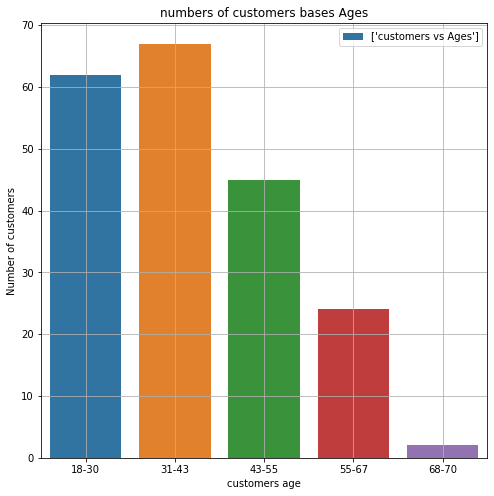

In [37]:
plt.figure(figsize=(8,8))
sns.barplot(x,y,label=["customers vs Ages"])
plt.xlabel("customers age")
plt.ylabel("Number of customers")
plt.title("numbers of customers bases Ages")
plt.legend()
plt.grid()
plt.show()

In [38]:
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
11,12,Female,35,19,99
19,20,Female,35,23,98
145,146,Male,28,77,97
185,186,Male,30,99,97
127,128,Male,40,71,95
...,...,...,...,...,...
30,31,Male,60,30,4
32,33,Male,53,33,4
8,9,Male,64,19,3
158,159,Male,34,78,1


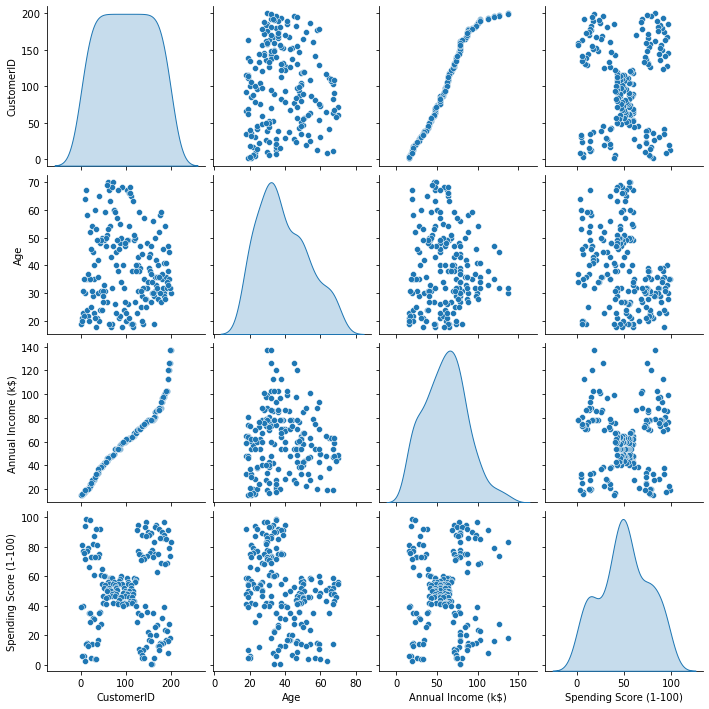

In [39]:
sns.pairplot(data=mall,diag_kind="kde")

# Preprocessing

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
encoder=  LabelEncoder()

In [42]:
mall.drop("CustomerID",axis=1,inplace=True)

In [43]:
mall["Gender"] =  encoder.fit_transform(mall[["Gender"]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [44]:
encoder.classes_

array(['Female', 'Male'], dtype=object)

In [45]:
gender_mapping =  {index:label for index ,label in enumerate(encoder.classes_)} # enumerate = loops (counting iteration)

In [46]:
gender_mapping

{0: 'Female', 1: 'Male'}

In [47]:
mall

,Gender,Age,Annual Income (k$),Spending Score (1-100)
11,0,35,19,99
19,0,35,23,98
145,1,28,77,97
185,1,30,99,97
127,1,40,71,95
...,...,...,...,...
30,1,60,30,4
32,1,53,33,4
8,1,64,19,3
158,1,34,78,1


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scale =  StandardScaler()

In [50]:
scaled_data = pd.DataFrame(scale.fit_transform(mall),columns= mall.columns)

In [51]:
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-0.886405,-0.276302,-1.586321,1.894492
1,-0.886405,-0.276302,-1.433644,1.855671
2,1.128152,-0.778669,0.627505,1.816849
3,1.128152,-0.635135,1.467233,1.816849
4,1.128152,0.082532,0.398489,1.739206
...,...,...,...,...
195,1.128152,1.517865,-1.166458,-1.793556
196,1.128152,1.015499,-1.051949,-1.793556
197,1.128152,1.804932,-1.586321,-1.832378
198,1.128152,-0.348068,0.665675,-1.910021


# Clustering

In [52]:
from sklearn.cluster import KMeans

In [53]:
km  = KMeans()

INERTIA = SUM OF SQAURED DISTANCE OF SAMPLE TO THEIR CLOSET CLUSTER CENTER

In [54]:
values=  []
for i in range(1,50):
    k  = KMeans(n_clusters=i,n_init=10)
    k.fit(mall)
    values.append(k.inertia_)

In [55]:
values

[308862.05999999994,
 212889.44245524282,
 143391.59236035676,
 104414.6753422017,
 75399.61541401489,
 58350.65449462817,
 51573.26479976477,
 44355.31351771351,
 40975.775288741745,
 37141.48254409698,
 34150.282930849084,
 32304.341851285957,
 29743.48584656084,
 28723.631908922995,
 25937.26569076347,
 25074.158611649775,
 24368.59575163398,
 22461.0441790094,
 20823.285924322485,
 19799.958008658006,
 18592.620024420026,
 18098.772528219983,
 17143.258913308913,
 16151.983982683983,
 16005.94481074481,
 15082.474603174607,
 14356.652056277055,
 13830.992327117334,
 13929.811192754614,
 12956.516819291828,
 12455.525749495602,
 11801.427106227113,
 11201.282575757572,
 10999.193506493511,
 10636.14007936508,
 10520.385533910534,
 9999.141666666668,
 9782.889285714286,
 9542.675793650793,
 9109.389826839826,
 9076.544191919193,
 8465.694841269838,
 8251.70173160173,
 8304.253246753244,
 7766.5261904761865,
 7745.346103896101,
 7481.113239538242,
 7284.280036630039,
 7194.39126984127

Text(0.5, 1.0, 'check best number of clussters')

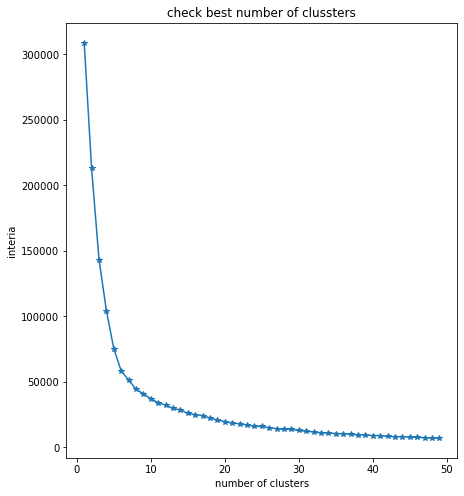

In [56]:
plt.figure(figsize=(7,8))
plt.plot(range(1,50),values,marker="*")
plt.xlabel("number of clusters")
plt.ylabel("interia")
plt.title("check best number of clussters")

# BEST NUMBER OF CLUSTER=  10

In [57]:
km.fit(scaled_data)

KMeans()

In [58]:
cluster=  km.predict(scaled_data)

In [59]:
cluster

array([4, 4, 2, 2, 2, 6, 4, 2, 6, 5, 5, 2, 2, 6, 2, 2, 6, 6, 6, 2, 6, 4,
       6, 6, 6, 6, 2, 5, 5, 4, 5, 6, 6, 6, 4, 4, 6, 4, 2, 6, 4, 2, 2, 6,
       2, 2, 5, 6, 4, 5, 4, 6, 4, 6, 2, 6, 2, 5, 4, 2, 5, 4, 7, 5, 4, 1,
       1, 5, 5, 7, 6, 1, 4, 1, 7, 1, 7, 5, 4, 1, 5, 1, 5, 5, 7, 5, 4, 4,
       1, 1, 7, 4, 1, 5, 7, 4, 7, 1, 4, 1, 4, 1, 5, 7, 1, 7, 1, 5, 4, 1,
       4, 4, 1, 7, 7, 7, 5, 7, 7, 1, 1, 1, 7, 1, 1, 1, 1, 7, 4, 4, 4, 3,
       4, 4, 7, 7, 5, 4, 3, 1, 3, 3, 5, 7, 0, 0, 4, 5, 3, 1, 3, 3, 1, 1,
       7, 3, 3, 1, 3, 1, 0, 3, 3, 3, 0, 3, 0, 0, 1, 3, 3, 3, 0, 1, 0, 1,
       1, 7, 0, 0, 3, 5, 0, 7, 0, 0, 0, 0, 3, 1, 4, 0, 1, 0, 3, 7, 7, 7,
       0, 0])

In [60]:
mall=  mall.reset_index()

In [61]:
mall

,index,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,11,0,35,19,99
1,19,0,35,23,98
2,145,1,28,77,97
3,185,1,30,99,97
4,127,1,40,71,95
...,...,...,...,...,...
195,30,1,60,30,4
196,32,1,53,33,4
197,8,1,64,19,3
198,158,1,34,78,1


# PCA

In [62]:
mall

,index,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,11,0,35,19,99
1,19,0,35,23,98
2,145,1,28,77,97
3,185,1,30,99,97
4,127,1,40,71,95
...,...,...,...,...,...
195,30,1,60,30,4
196,32,1,53,33,4
197,8,1,64,19,3
198,158,1,34,78,1


In [63]:
from sklearn.decomposition import PCA

In [64]:
pc=  PCA(n_components=2)

In [65]:
data =pc.fit_transform(scaled_data)

In [66]:
pca =  pd.DataFrame(data,columns=["pca1","pca2"])

In [67]:
pca

,pca1,pca2
0,-1.689470,-1.545428
1,-1.663732,-1.432598
2,-1.523165,1.455681
3,-1.429536,2.083401
4,-0.876018,1.183114
...,...,...
195,2.547592,-0.527914
196,2.201317,-0.388196
197,2.774286,-0.882988
198,1.332874,1.055587


In [68]:
km.cluster_centers_,cluster

(array([[ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
        [-0.88640526,  0.89190047, -0.52818008, -0.36794213],
        [ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
        [-0.88640526,  0.15788672,  0.99774888, -0.96083363],
        [-0.88640526, -0.92220196, -0.80272555,  0.36104051],
        [ 1.12815215, -0.94229664, -0.76949569,  0.34162973],
        [-0.88640526, -0.45245636,  0.94327069,  1.17982252],
        [ 1.12815215,  1.43505777, -0.45298304, -0.40195247]]),
 array([4, 4, 2, 2, 2, 6, 4, 2, 6, 5, 5, 2, 2, 6, 2, 2, 6, 6, 6, 2, 6, 4,
        6, 6, 6, 6, 2, 5, 5, 4, 5, 6, 6, 6, 4, 4, 6, 4, 2, 6, 4, 2, 2, 6,
        2, 2, 5, 6, 4, 5, 4, 6, 4, 6, 2, 6, 2, 5, 4, 2, 5, 4, 7, 5, 4, 1,
        1, 5, 5, 7, 6, 1, 4, 1, 7, 1, 7, 5, 4, 1, 5, 1, 5, 5, 7, 5, 4, 4,
        1, 1, 7, 4, 1, 5, 7, 4, 7, 1, 4, 1, 4, 1, 5, 7, 1, 7, 1, 5, 4, 1,
        4, 4, 1, 7, 7, 7, 5, 7, 7, 1, 1, 1, 7, 1, 1, 1, 1, 7, 4, 4, 4, 3,
        4, 4, 7, 7, 5, 4, 3, 1, 3, 3, 5, 7, 0, 0, 4, 5, 3,

In [69]:
reduce_center =  pc.transform(km.cluster_centers_)

In [70]:
reduce_center

array([[ 1.19961046,  1.30582744],
       [ 0.6618117 , -1.09032193],
       [-0.88272588,  1.65431318],
       [ 0.55487149,  0.09231465],
       [-1.08519272, -1.03707577],
       [-0.61387036,  0.25133053],
       [-1.33511175,  0.33485089],
       [ 1.5303687 ,  0.17028966]])

In [71]:
pca["cluster"] = cluster

In [72]:
pca

,pca1,pca2,cluster
0,-1.689470,-1.545428,4
1,-1.663732,-1.432598,4
2,-1.523165,1.455681,2
3,-1.429536,2.083401,2
4,-0.876018,1.183114,2
...,...,...,...
195,2.547592,-0.527914,7
196,2.201317,-0.388196,7
197,2.774286,-0.882988,7
198,1.332874,1.055587,0


# Data visualisation

In [73]:
pca["cluster"].unique()

array([4, 2, 6, 5, 7, 1, 3, 0])

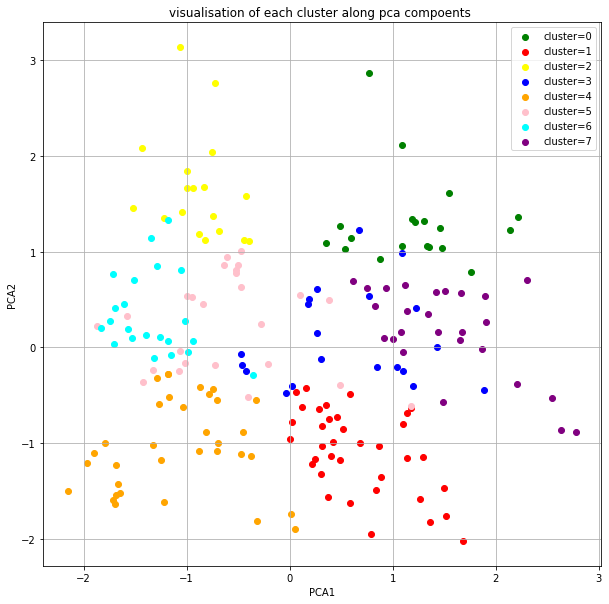

In [74]:
plt.figure(figsize=(10,10))
plt.scatter(pca[pca.cluster==0]["pca1"],pca[pca.cluster==0]["pca2"],color="green",label="cluster=0")
plt.scatter(pca[pca.cluster==1]["pca1"],pca[pca.cluster==1]["pca2"],color="red",label="cluster=1")
plt.scatter(pca[pca.cluster==2]["pca1"],pca[pca.cluster==2]["pca2"],color="yellow",label="cluster=2")
plt.scatter(pca[pca.cluster==3]["pca1"],pca[pca.cluster==3]["pca2"],color="blue",label="cluster=3")
plt.scatter(pca[pca.cluster==4]["pca1"],pca[pca.cluster==4]["pca2"],color="orange",label="cluster=4")
plt.scatter(pca[pca.cluster==5]["pca1"],pca[pca.cluster==5]["pca2"],color="pink",label="cluster=5")
plt.scatter(pca[pca.cluster==6]["pca1"],pca[pca.cluster==6]["pca2"],color="cyan",label="cluster=6")
plt.scatter(pca[pca.cluster==7]["pca1"],pca[pca.cluster==7]["pca2"],color="purple",label="cluster=7")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid()
plt.title("visualisation of each cluster along pca compoents ")
plt.legend()
plt.show()
